# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  60 баллов

In [ ]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 28.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import subprocess
from tqdm.notebook import tqdm
import shutil

import torch
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, RandomSampler, random_split
from torch.nn import BCEWithLogitsLoss

import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
from sklearn.utils.random import sample_without_replacement

In [ ]:
import albumentations as A

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
from PIL import Image

In [ ]:
import lightning.pytorch as pl

In [ ]:
from lightning.pytorch import loggers as pl_loggers
from lightning.pytorch.callbacks import Callback, ModelCheckpoint, DeviceStatsMonitor, EarlyStopping

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Условие
В этом задании вам предстоит реализовать модель **U-Net** для задачи семантической сегментации. Для оценки качества вам понадобится реализовать метрику IoU.


# 1.1. Данные

## Профиль биология
Мы предлагаем вам поработать с датасетом [раковых клеток HT29 различных фенотипов](https://bbbc.broadinstitute.org/BBBC018). В данном задании мы будем выделять границы клеток. Далее расписан процес загрузки данных.

**Внимание.** Нужно скачать данные [отсюда](https://drive.google.com/file/d/1is6qQzqz7tWqlEpRynUcjjehIONiS-D5/view?usp=share_link) и положить на свой диск.

Подготовим данные

Определим путь к данным

In [ ]:
DATA_PATH = '/content/drive/MyDrive/data.zip'

Разархивируем их

In [ ]:
! unzip $DATA_PATH

Archive:  /content/drive/MyDrive/data.zip
   creating: BBBC018_v1_images-fixed/
   creating: BBBC018_v1_images-fixed/test/
  inflating: BBBC018_v1_images-fixed/test/00733-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/test/05624-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/test/05899-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/test/10780-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/test/13361-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/test/13569-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/test/19466-actin.DIB.bmp  
   creating: BBBC018_v1_images-fixed/train/
  inflating: BBBC018_v1_images-fixed/train/00735-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/train/00736-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/train/03997-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/train/03998-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/train/03999-actin.DIB.bmp  
  inflating: BBBC018_v1_images-fixed/train/04000-actin.DIB.b

Данные уже разделены на трейн и валидацию. В папках `BBBC018_v1_images-fixed` и `BBBC018_v1_outlines` лежат изображения клеток и их маски соответсвенно. Для изображений клеток из папки `test` доступны только изображения клеток. Как работает на них ваша сеть, вы посмотрите в конце задания.

Посмотрим на количество данных

In [ ]:
TRAIN_IMAGES_PATH = '/content/BBBC018_v1_images-fixed/train'
VAL_IMAGES_PATH = '/content/BBBC018_v1_images-fixed/val'

TRAIN_MASKS_PATH = '/content/BBBC018_v1_outlines/train'
VAL_MASKS_PATH = '/content/BBBC018_v1_outlines/val'

In [ ]:
print(f'Размер обучающего датасета: {len(os.listdir(TRAIN_IMAGES_PATH))}')
print(f'Размер валидационного датасета: {len(os.listdir(VAL_IMAGES_PATH))}')

Размер обучающего датасета: 41
Размер валидационного датасета: 7


Как вы видите, размер датасетов очень небольшой.

Изображения и маски имеют одинаковое начало названия (номер). Название файла маски отличается тем, что часть `actin.DIB` меняется на `cells`, а также сам файл имеет другой формат -- png вместо bmp. Так можно получить изображение и его маску из трейна.



In [ ]:
img_name = "00735-actin.DIB.bmp"
mask_name = img_name.replace('actin.DIB.bmp', 'cells.png')

img_path = os.path.join(TRAIN_IMAGES_PATH, img_name)
mask_path = os.path.join(TRAIN_MASKS_PATH, mask_name)

Визуализруем изображение и маску.

In [ ]:
# Human HT29 colon-cancer cells
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Изображение")
plt.imshow(Image.open(img_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Маска")
plt.imshow(Image.open(mask_path), 'gray')
plt.axis("off");

In [ ]:
image2ndarray = np.array(Image.open(img_path), dtype=np.uint8)

In [ ]:
image2ndarray.shape

(512, 512, 3)

In [ ]:
mask2ndarray = np.array(Image.open(mask_path), dtype=np.uint8)
mask2ndarray.shape

(512, 512)

In [ ]:
aug_example = aug(image=image2ndarray, mask=mask2ndarray)

In [ ]:
aug_example["image"].shape, aug_example["mask"].shape
type(aug_example["image"]), type(aug_example["mask"])

(numpy.ndarray, numpy.ndarray)

In [ ]:
((aug_example["image"]).transpose(2, 0, 1)).shape

(3, 512, 512)

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title("Image")
plt.imshow(Image.open(img_path))
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Mask")
plt.imshow(Image.open(mask_path), 'gray')
plt.axis("off");

plt.subplot(2, 2, 3)
plt.title("Augmented image")
plt.imshow(aug_example['image'])
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Augmented mask")
plt.imshow(aug_example['mask'], 'gray')
plt.axis("off");

# 1.2. Реализуем класс датасет для задачи семантической сегментации.

На семинаре мы применяли аугментации прямо во время обучения и выносили их в функцию для обучения, однако для `albumentations` это делать сильно неудобно, поскольку эта библиотека работает с `numpy` массивами. В данном случае есть два варианта: аугментировать датасет заранее и сохранить на диск; вынести агументацию в класс для датасета и делать ее "на лету" при получении объекта. Мы используем второй подход.

Как обычно, чтобы создать свой класс датасет, нужно наследовать его от класса `Dataset` из torch.utils.data, и переопределить функции `__len__` и `__getitem__`.  

In [ ]:
resize = A.Compose([
    A.Resize(height=256, width=256)
])

In [ ]:
aug = A.Compose([
    A.Flip(p=0.8),
    A.Rotate(limit=180, p=0.7),
    A.RandomBrightnessContrast(p=0.9)]);

<ipython-input-13-3982a6048edb>:2: DeprecationWarning: Flip is deprecated. Consider using HorizontalFlip, VerticalFlip, RandomRotate90 or D4.
  A.Flip(p=0.8),


In [ ]:
class CellsDataset(Dataset):
    def __init__(self, data_path, mask_path, aug=None, resize=None):
        """
        Args:
            data_path: путь до изображений.
            mask_path: путь до масок изображений.
        """
        self.data_path = data_path
        self.mask_path = mask_path

        # Файлы с изображениями и масками
        self.files = os.listdir(data_path)
        self.mask_files = os.listdir(self.mask_path)

        assert len(self.files) == len(self.mask_files)

        # Сортируем файлы, чтобы было соответствие
        # между изображениями и масками за счет порядка следования.
        self.files.sort()
        self.mask_files.sort()

        # агументация из albumentations
        self.aug = aug
        self.resize = resize
        # if self.target_size:
        #   self.image_transform = transforms.Resize(target_size, interpolation=Image.BILINEAR)
        #   self.mask_transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        # Загружаем изображение и маску
        file_name = os.path.join(self.data_path, self.files[idx])
        mask_name = os.path.join(self.mask_path, self.mask_files[idx])


        # Пробразуем изображение и маску в numpy массив (расскомментируйте нужное!)

        # датасет биологии
        input = np.array(Image.open(file_name), dtype=np.uint8)
        target = np.array(Image.open(mask_name), dtype=np.uint8)

        # датасет физики
#         input = Image.open(file_name)
#         target = Image.open(mask_name)
#         transform = transforms.Resize((512, 512))
#         input = transform(input)
#         target = transform(target)
#         input = np.array(input, dtype=np.uint8)
#         target = np.array(target, dtype=np.uint8)

        if self.resize:
          resized = self.resize(image=input, mask=target)
          input = resized['image']
          target = resized['mask']
        # применяем аугментацию
        if self.aug:
          augmented = self.aug(image=input, mask=target)
          input = augmented['image']
          target = augmented['mask']

        # исправим порядок размерностей
        input = input.transpose(2, 0, 1)

        # Приводим к torch tensor
        input = torch.tensor(input, dtype=torch.float32)
        target = torch.from_numpy(target)

        # Приводим таргет/маску к такому виду,
        # чтобы его значения были от 0 до 1
        target = (target > 0).int().unsqueeze(0)

        return input, target

Получим датасет из данных. Для обучающего датасета используем аугментацию, а для валидационного - нет.

In [ ]:
# Датасет с данными для обучения и вадидации

# train_dataset_resized = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, aug=aug, resize=resize)
# val_dataset_resized = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)

Визуализируем

In [ ]:
i = 1

plt.figure(figsize=(15, 7))

# Заметьте: мы сохраняем семпл в отдельную переменную, поскольку при каждом обращении будет применяться аугментация и изображение будет выглядеть иначе!
sample = train_dataset[i]

plt.subplot(1, 2, 1)
plt.title("Изображение")
plt.imshow(sample[0].permute(1, 2, 0).int())
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Маска")
plt.imshow(sample[1].squeeze(), cmap='Greys_r')
plt.axis("off");

print("Значения в маске и количество значений:", np.unique(train_dataset[i][1], return_counts=True))

# 2. Релизация метрики IoU
Реализуйте метрику IoU. Она вам понадобится далее для оценивания результатов предсказания модели.


In [ ]:
def iou(predicted_mask_batch, target_mask_batch):
    """ Считает среднее IoU для всех элементов батча """
    # Площадь пересечения в пикселях
    intersection = (predicted_mask_batch & target_mask_batch).sum(dim=(1, 2, 3))
    # Площадь объединения в пикселях
    union = (predicted_mask_batch | target_mask_batch).sum(dim=(1, 2, 3))
    iou = intersection/union
    return iou

In [ ]:
predicted_mask_batch = torch.ones((1, 1, 10, 10)).bool()
target_mask_batch =  torch.ones((1, 1, 10, 10)).bool()
assert torch.allclose(iou(predicted_mask_batch, target_mask_batch), torch.tensor(1.0))

# 3. Реализация модели
- Реализуйте модель U-Net.




In [ ]:
def conv_bn_relu(in_channels, out_channels, kernel=3, stride=1, padding=1):
    net = nn.Sequential(
        nn.Conv2d(in_channels, out_channels,
                  kernel_size=kernel, stride=stride, padding=padding),
        nn.BatchNorm2d(num_features=out_channels),
        nn.ReLU(inplace=True)
    )
    return net


class Stacked2ConvsBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Stacked2ConvsBlock, self).__init__()
        self.blocks = nn.Sequential(
            conv_bn_relu(in_channels, out_channels),
            conv_bn_relu(out_channels, out_channels)
        )

    def forward(self, net):
        net = self.blocks(net)
        return net


class UpSamplingBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpSamplingBlock, self).__init__()

        # Понижаем число каналов
        self.upsample = nn.ConvTranspose2d(
            in_channels, in_channels, kernel_size=2, stride=2)

        # Стакаем с симметричным слоем из левой половины "U".
        # Число каналов входной карты при этом удваивается.
        self.convolve = Stacked2ConvsBlock(2 * in_channels, out_channels)

    def forward(self, left_net, right_net):
        right_net = self.upsample(right_net)
        # конкатенируем векторы из левой и правой половины
        net = torch.cat((left_net, right_net), dim=1)
        # применяем свертку
        net = self.convolve(net)
        return net


class DownSamplingBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownSamplingBlock, self).__init__()
        self.blocks = nn.Sequential(
            nn.MaxPool2d(2, 2),
            Stacked2ConvsBlock(in_channels, out_channels)
        )

    def forward(self, net):
        return self.blocks(net)


class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        self.init_conv = Stacked2ConvsBlock(3, 64)

        self.downsample_1 = DownSamplingBlock(64, 128)
        self.downsample_2 = DownSamplingBlock(128, 256)
        self.downsample_3 = DownSamplingBlock(256, 512)
        self.downsample_4 = DownSamplingBlock(512, 1024)

        # В середине есть блок без пары с 1024 каналами
        # с ним конкатенировать некого, потому просто свернём его
        self.upconv = Stacked2ConvsBlock(1024, 512)

        # Подъём. Аналогично.
        self.upsample_1 = UpSamplingBlock(512, 256)
        self.upsample_2 = UpSamplingBlock(256, 128)
        self.upsample_3 = UpSamplingBlock(128, 64)
        # Чтобы учесть входной слой после самой первой свёртки и согласовать размерности
        self.upsample_4 = UpSamplingBlock(64, 64)

        # Предсказание
        self.agg_conv = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        net0 = self.init_conv(x) # 3 --> 64

        net1 = self.downsample_1(net0) # 64 --> 128
        net2 = self.downsample_2(net1) # 128 --> 256
        net3 = self.downsample_3(net2) # 256 --> 512
        net = self.downsample_4(net3) # 512 --> 1024

        net = self.upconv(net) # 1024 --> 512

        net = self.upsample_1(net3, net) # 512 --> 256
        net = self.upsample_2(net2, net) # 256 --> 128
        net = self.upsample_3(net1, net) # 128 --> 64
        net = self.upsample_4(net0, net) # 64 --> 64

        net = self.agg_conv(net) # 64 --> 1

        return net

# Обучение модели

- Напишите пайплайн обучения и обучите модель.
  - Обязательно сохраняйте веса модели, например после каждого улучшения метрики на валидации.
  - Сохраняйте историю обучения.
  - Визуализируйте предсказания (маски) для некоторых заранее выбранных изображений во время обучения, можно с определенным интервалом.
  - Визуализируйте графики лоссов и метрик во время обучения, можно с определенным интревалом.

- Визуализируйте работу модели на тестовых данных. Подсказка: для тестовых данных можно использовать тот же класс датасета, что и выше, куда можно передавать одинаковые директории (масками мы все равно не будем пользоваться).

**Внимание.** В данном случае вы имеете дело со сложной задачей, в которой:
  - мало данных
  - наблюдается сильный дисбаланс классов (большая часть сегментационной маски относится к фону)

Для борьбы с этими проблемами можно использовать аугментацию данных (например, повороты, отражения, изменение яркости и контраста), перевзвешивание классов в loss-функции, использовать менее чувствительную к дисбалансу класс функцию потерь (например, `DiceLoss` из `torchgeometry.losses.dice`).

Поставьте следующие эксперименты:

1. Поскольку данных явно очень мало, уменьшите размер сети (количество блоков: например, уберите последний блок так, чтобы максимальное количество каналов в сети было равно 512, а не 1024), и обучите уменьшенную сеть на исходных данных без аугментаций. Саму сеть вынесите в отдельный класс `SmallUnet`. В качестве лосса используйте обычный `torch.nn.BCEWithLogitsLoss`. Прокомментируйте результат. Не застревайте надолго на этом пункте.
2. Добавьте аугментации и обучите уменьшенную сеть с ними. Советуем использовать повороты, отражения, изменение яркости и контраста (все они есть выше, нужно лишь немного подправить). В качестве лосса используйте обычный `torch.nn.BCEWithLogitsLoss`. Прокомментируйте результат. Не застревайте надолго на этом пункте.
3. К аугментациям добавьте вес положительного класса в лоссе `torch.nn.BCEWithLogitsLoss`. Обратите внимание на описание параметра `pos_weight`. Прокомментируйте результат.
4. Используя все наработки из предыдущих пунктов обучите итоговый вариант сети. Здесь уже можно попробовать использовать большую сеть. Если вы решите взять `DiceLoss`, обратите внимание на вход `torchgeometry.losses.dice.DiceLoss` (подсказка: наша реализация выдает на вход только одно число для каждого пикселя, а для этого лосса нужны еще логиты для класса 1, поэтому архитектуру сети придется немного поменять). **Итоговый вариант сети должен преодолеть порог 0.2 по метрике IoU на валидационном датасете.**


Для облегчения выполнения задания вам даны вспомогательные функции.

In [ ]:
def vis_dataset(val_dataset, segment_model, n_img=4, savefig_dir=None):
    plt.figure(figsize=(20, n_img * 3.5))

    for i, (image, mask) in enumerate(val_dataset):
        if i == n_img:
            break

        plt.subplot(n_img, 4, 4 * i + 1)
        plt.imshow(image.permute(1, 2, 0).cpu().int())
        plt.axis("off")
        plt.title("Изображение")

        plt.subplot(n_img, 4, 4 * i + 2)
        plt.imshow(mask.squeeze().cpu())
        plt.axis("off")
        plt.title("Реальная маска")

        with torch.no_grad():
            pred = segment_model(image.unsqueeze(dim=0).to(device)).squeeze().cpu()

        plt.subplot(n_img, 4, 4 * i + 3)
        plt.imshow(pred > 0.)
        plt.axis("off")
        plt.title("Предсказанная маска")

        plt.subplot(n_img, 4, 4 * i + 4)
        plt.imshow(pred)
        plt.axis("off")
        plt.title("Логиты")

    if savefig_dir is not None:
        plt.savefig(os.path.join(savefig_dir, f"results_epoch_{epoch:03d}.png"))
    plt.show()

General Lightning module

In [ ]:
class SegmentationModel(pl.LightningModule):
    def __init__(self, model,
                 lr=2e-3,
                 loss=nn.BCEWithLogitsLoss(),
                 metric=iou,
                 plot_period=4):
        '''Инициализирует модуль
        * layer_widths -- список размерностей скрытых слоев в U-Net'''
        super().__init__()
        self.lr = lr
        self.criterion = loss
        self.save_hyperparameters()
        self.model = model
        self.predictions = []
        self.metric = metric
        # naive logger
        self.plot_period = plot_period
        self.batch_n = 0
        self.val_loss = []
        self.train_loss = []
        self.val_iou = []
        self.train_iou = []

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)

    def forward(self, x):
        return self.model(x)

    def __step(self, batch, name):
        ''' Описывает 1 шаг обучения на batch
        * name -- либо train, либо val'''
        images, target = batch
        output = self.forward(images)
        loss = self.criterion(output.float(), target.float()) #обратите внимание, какого типа должны быть данные в тензорах?
        iou = self.metric(output > 0, target > 0)

        self.log(name+'_loss', loss)
        self.log(name+'_iou', iou.mean(), on_step=False, on_epoch=True)

        if(name=="val"):
          self.val_loss.append(loss.detach().cpu().numpy())
          self.val_iou.append(iou.mean().detach().cpu().numpy())
        elif(name=="train"):
          self.train_loss.append(loss.detach().cpu().numpy())
          self.train_iou.append(iou.mean().detach().cpu().numpy())

        if(self.batch_n % self.plot_period == 0):
          self.plot_progress(batch[0][0,:], output[0,:])

        self.batch_n = self.batch_n + 1
        return loss

    def training_step(self, batch, batch_idx):
        return self.__step(batch, "train")

    def validation_step(self, batch, batch_idx):
        return self.__step(batch, "val")

    def plot_progress(self, image, pred):
      image = image.permute(1, 2, 0).int().cpu().numpy()
      pred = (pred.squeeze().float().detach().cpu().numpy() > 0)
      # mask = (batch[1][0,:].squeeze().int())
      print(f'#### EPOCH:{self.current_epoch} BATCH: {self.batch_n} ####')
      fig, axs = plt.subplots(1, 4, figsize=(16, 4))
      axs[0].imshow(image)
      axs[0].set_title("Image")

      axs[1].imshow(pred, cmap='gray')
      axs[1].set_title("Prediction")

      axs[2].plot(self.train_loss, label='train')
      axs[2].plot(self.val_loss, label='val')
      axs[2].set_title("Loss")

      axs[3].plot(self.train_iou, label='train')
      axs[3].plot(self.val_iou, label='val')
      axs[3].set_title("IoU")
      plt.tight_layout()
      plt.legend()
      plt.show()


Пример задания даталоадеров

In [ ]:

# batch_size = 1

# train_sampler = torch.utils.data.RandomSampler(train_dataset_resized)
# train_dataloader_ctrl = DataLoader(train_dataset_resized, batch_size=batch_size, sampler=train_sampler)
# val_dataloader_ctrl = DataLoader(val_dataset_resized, batch_size=batch_size)

In [ ]:
# batch = next(iter(train_dataloader_ctrl))
# print(type(batch[0][0,:]))
# print((batch[0][0,:].shape))
# print(type(batch[1][0,:]))
# print((batch[1][0,:].shape))

<class 'torch.Tensor'>
torch.Size([3, 256, 256])
<class 'torch.Tensor'>
torch.Size([1, 256, 256])


In [ ]:
# images, masks = next(iter(train_dataloader_ctrl))
# print("Batch sizes: ", images.shape, masks.shape)
# print("Batch types: ", type(images), type(masks))


Batch sizes:  torch.Size([1, 3, 256, 256]) torch.Size([1, 1, 256, 256])
Batch types:  <class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
class SmallUnet(nn.Module):
    def __init__(self):
        super(SmallUnet, self).__init__()
        self.init_conv = Stacked2ConvsBlock(3, 64)

        self.downsample_1 = DownSamplingBlock(64, 128)
        self.downsample_2 = DownSamplingBlock(128, 256)
        self.downsample_3 = DownSamplingBlock(256, 512)

        # В середине есть блок без пары с 1024 каналами
        # с ним конкатенировать некого, потому просто свернём его
        self.upconv = Stacked2ConvsBlock(512, 256)

        # Подъём. Аналогично.
        self.upsample_2 = UpSamplingBlock(256, 128)
        self.upsample_3 = UpSamplingBlock(128, 64)
        # Чтобы учесть входной слой после самой первой свёртки и согласовать размерности
        self.upsample_4 = UpSamplingBlock(64, 64)

        # Предсказание
        self.agg_conv = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        net0 = self.init_conv(x) # 3 --> 64

        net1 = self.downsample_1(net0) # 64 --> 128
        net2 = self.downsample_2(net1) # 128 --> 256
        net = self.downsample_3(net2) # 256 --> 512
        # net = self.downsample_4(net3) # 512 --> 1024

        net = self.upconv(net) # 512 --> 256

        # net = self.upsample_1(net3, net) # 512 --> 256
        net = self.upsample_2(net2, net) # 256 --> 128
        net = self.upsample_3(net1, net) # 128 --> 64
        net = self.upsample_4(net0, net) # 64 --> 64

        net = self.agg_conv(net) # 64 --> 1

        return net

In [ ]:
# test_model = SmallUnet()

In [ ]:
# images, masks = next(iter(train_dataloader_ctrl))
# output = test_model(images)

In [ ]:
# print(output.shape, type(output))

torch.Size([1, 1, 256, 256]) <class 'torch.Tensor'>


In [ ]:
# (output.float().squeeze()).shape

torch.Size([256, 256])

# 4. Эксперименты

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=lightning_logs/

## Эксперимент 1

Обучим небольшую сеть на исходных данных

In [ ]:
# ! rm -r /content/lightning_logs/

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor='val_iou', mode='max')
device_stats = DeviceStatsMonitor()
early_stopping = EarlyStopping('val_loss')

In [ ]:
model = SegmentationModel(model=SmallUnet(), plot_period=8)
trainer = pl.Trainer(
    logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SmallUnet1_simplest"),
    callbacks = [checkpoint_callback,
                 early_stopping,
                 device_stats],
    accelerator = "gpu",
    max_epochs = 30)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
train_dataset = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, resize=resize)
val_dataset = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)

batch_size = 5

train_sampler = torch.utils.data.RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
trainer.fit(model, train_dataloader, val_dataloader)

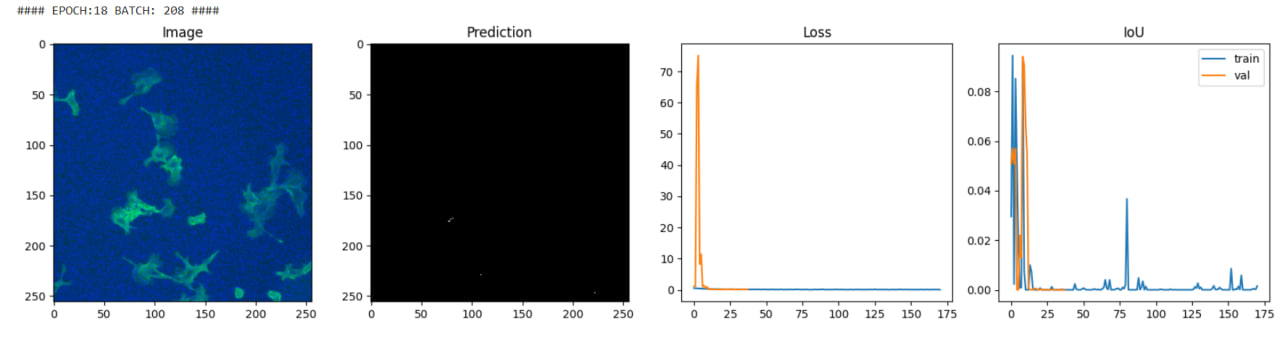

**Вывод.** Из-за сильного дисбаланса классов (площадь границы клеток на фотографиях заметно меньше площади фона) наивная модель "учится" предсказывать фон, так как это достаточно выгодно в плане уменьшения loss-а. Пример см. на картинке выше.

## Эксперимент 2

Добавим аугментации

**Примечание:** уменьшил вероятности применения аугментаций, теперь хотя бы одна аугментация применяется с вероятностью 0.784. Раньше это значение было почти 1. Мне показалось, что будет разумным оставить в тренировочном датасете какую-то часть неизмененных данных.

In [ ]:
aug2 = A.Compose([
    A.HorizontalFlip(p=0.4),
    A.Rotate(limit=180, p=0.4),
    A.RandomBrightnessContrast(p=0.4)]);

In [ ]:
train_dataset = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, aug=aug2, resize=resize)
val_dataset = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)

batch_size = 5

train_sampler = torch.utils.data.RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
model2 = SegmentationModel(model=SmallUnet(), plot_period=10)
trainer = pl.Trainer(
    logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SmallUnet2_augment2"),
    callbacks = [checkpoint_callback,
                 #early_stopping,
                 device_stats],
    accelerator = "gpu",
    max_epochs = 15)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model2, train_dataloader, val_dataloader)

**Вывод.** Модель все еще оптимизируется, предсказывая фон. Несмотря на отсутствие адекватной сегментации, использование аугментаций позволяет показать плохое обучение еще и по loss-у: при приблизительно одинаковом финальном training loss (0.14 при обучении с аугментациями, 0.13 в случае "наивного" обучения), финальный validation loss отличается: 0.33 при обучении с аугментациями, 0.17 при наивном обучении (из-за масштаба этого не видно на графиках). Полагаю, более высокий validation loss говорит о том, что аугментации помогли сделать тренировочный датасет более отличающимся от валидационного. Наблюдаемое поведение демонстрирует, что модель не выучивает признаки по-настоящему.
**Примечание: слева valid loss, справа train loss; темно-краснные графики -- обучение с аугментациями, оранжевые -- "наивное" обучение**

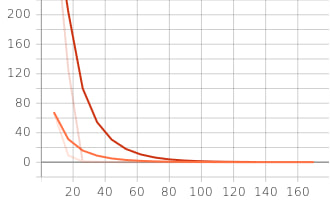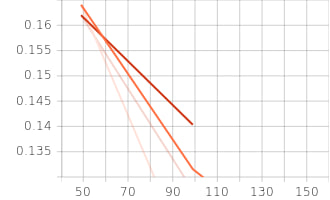

## Эксперимент 3

Добавим веса к лоссу дополнительно к аугментациям

Оценим по тренировочному датасету медианное значение отношения background/target, чтобы использовать как pos_weight в BCEWithLogitsLoss

In [ ]:
train_dataset = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, aug=aug2, resize=resize)

batch_size = 1

train_sampler = torch.utils.data.RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)

In [ ]:
background2target_ratio = []
for i, (image, mask) in enumerate(train_dataloader):
  foreground = torch.sum(mask > 0).item()
  background = torch.sum(mask == 0).item()
  assert(foreground+background == 256*256)
  if foreground > 0:
    background2target_ratio.append(background/foreground)



In [ ]:
background2target_ratio = np.array(background2target_ratio)

In [ ]:
background2target_ratio
np.median(background2target_ratio)

26.148301574150786

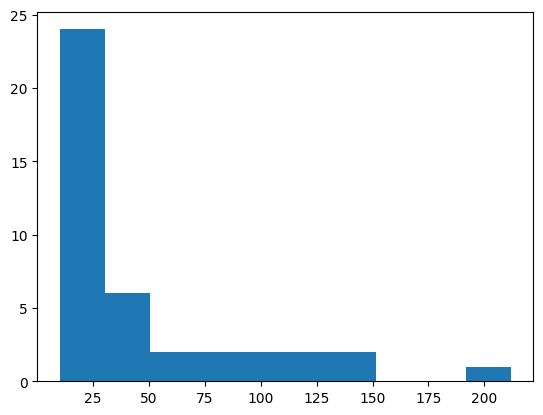

In [ ]:
plt.hist(x=background2target_ratio);

In [ ]:
train_dataset = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, aug=aug2, resize=resize)
val_dataset = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)

batch_size = 5

train_sampler = torch.utils.data.RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
target_weight = torch.tensor([26])
target_weight.shape

torch.Size([1])

In [ ]:
model3 = SegmentationModel(model=SmallUnet(), plot_period=10, loss=nn.BCEWithLogitsLoss(pos_weight=target_weight))
trainer = pl.Trainer(
    logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SmallUnet3_augment_pos_weight2"),
    callbacks = [checkpoint_callback,
                 #early_stopping,
                 device_stats],
    accelerator = "gpu",
    max_epochs = 30)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model3, train_dataloader, val_dataloader)

**Вывод.** Добавление весов существенно улучшило обучение. Теперь модель действительно пытается предсказывать объекты на фотографии, а не фон.

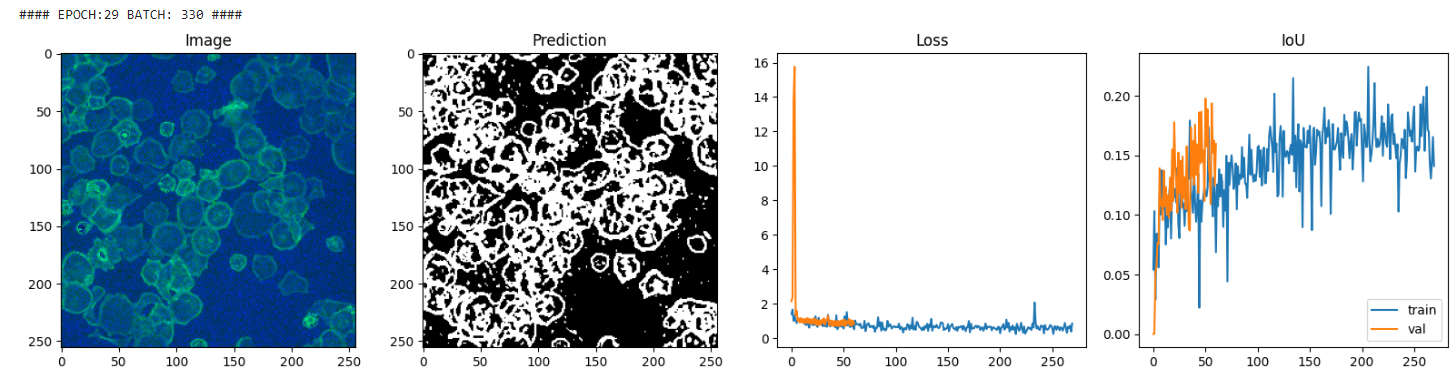

По графикам видно, что после добавления весов IoU стал заметно выше (~0.16 против ~0 в прошлые разы) и на train, и на valid. Val loss, напротив, уменьшился. Это показывает, что модель действительно обучается. Training loss стал ожидаемо выше, но это нормально, так как теперь процесс обучения модели адекватен.

**Порядок графиков (слева-направо): val IoU, val loss, train IoU, train loss. Малиновый график соответствует обучению с аугментациями и весами**


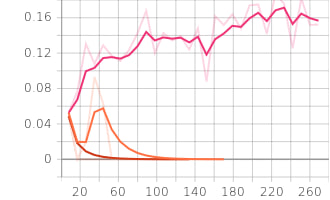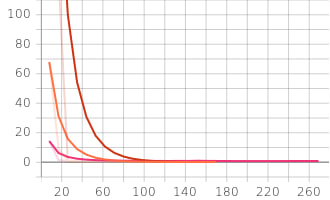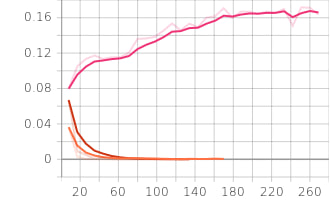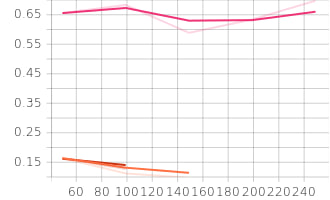

## Эксперимент 4

Обучим большую сеть в предыдущем сетапе

In [ ]:
train_dataset = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, aug=aug2, resize=resize)
val_dataset = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)

batch_size = 5

train_sampler = torch.utils.data.RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
model4 = SegmentationModel(model=Unet(), plot_period=10, loss=nn.BCEWithLogitsLoss(pos_weight=target_weight))
trainer = pl.Trainer(
    logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/Unet4_augment_pos_weight"),
    callbacks = [checkpoint_callback,
                 early_stopping,
                 device_stats],
    accelerator = "gpu",
    max_epochs = 30)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# ! rm -r /content/lightning_logs/Unet4_augment_pos_weight

In [ ]:
trainer.fit(model4, train_dataloader, val_dataloader)

In [ ]:
# model4_1 = SegmentationModel(model=Unet(), plot_period=10, loss=nn.BCEWithLogitsLoss(pos_weight=target_weight))
# trainer = pl.Trainer(
#     logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/Unet4_augment_pos_weight2"),
#     callbacks = [checkpoint_callback,
#                  early_stopping,
#                  device_stats],
#     accelerator = "gpu",
#     max_epochs = 30)

In [ ]:
# trainer.fit(model4_1, train_dataloader, val_dataloader)

**Вывод.** Лучший результат (зеленые кривые) был получен моделью SmallUnet с использованием аугментаций и весов в Loss-функции (дальше стоило работать с ней, но я по ошибке взял полноразмерный Unet, тем не менее финальный результат получился вполне приличным). Это видно по всем графикам: loss +- меньше, IoU +- побольше, чем у "конкурентов". Любопытно, что у полноразмерного Unet (серый график) под конец обучения резко вырос train loss и упал valid IoU. Не совсем понимаю причину такого поведения, но предположу, что это может быть связано с относительно большим размером сети (~30M параметров) при небольших размерах датасетов. Возможно, сеть начала переобучаться.

**Порядок графиков (слева-направо): val loss, val IoU, train loss, train IoU**

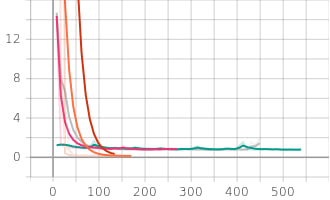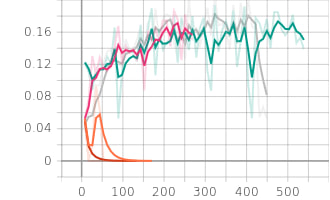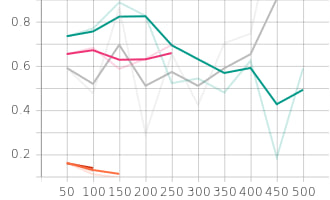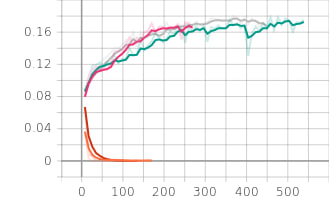

## Эксперимент 5 (необязательный, SmallUnet с аугментациями и весами на большем кол-ве эпох)

In [ ]:
train_dataset = CellsDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, aug=aug2, resize=resize)
val_dataset = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)

batch_size = 5

train_sampler = torch.utils.data.RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
model3_1 = SegmentationModel(model=SmallUnet(), plot_period=10, loss=nn.BCEWithLogitsLoss(pos_weight=target_weight))
trainer = pl.Trainer(
    logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SmallUnet3_augment_pos_weight3"),
    callbacks = [checkpoint_callback,
                 #early_stopping,
                 device_stats],
    accelerator = "gpu",
    max_epochs = 60)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model3_1, train_dataloader, val_dataloader)

## Дополнительное улучшение модели

Как вы могли заметить, до сих пор мы выбирали, к какому классу относить пиксель по порогу 0.5 (эквивалентно logit > 0). Тем не менее в задачах с сильным дисбалансом классов иногда получается улучшить качество с помощью подбора порога уверенности модели. Интуиция здесь понятна: пусть, например, у вас классификатор сильно смещен в сторону класса 1, тогда вполне логично отдавать класс 1 только тогда, когда классификатор в этом очень уверен.

Для вашей лучше модели реализуйте подсчет IoU с предсказанием по порогу. Не забудьте, что сеть предсказывает логиты, а не вероятности, а также то, что реализованная функция для IoU считает среднее по батчу (тогда вам нужно брать батч размера 1). Постройте график. Прокомментируйте результаты.

In [ ]:
def calculate_iou_with_threshold(segment_model, val_dataloader, threshold=0.5):
    iou = []
    for i, (image, mask) in enumerate(val_dataloader):
      ground_truth = ( mask > 0 )
      logit = nn.Sigmoid()(segment_model(image))
      pred = ( logit > threshold )

      intersection = (pred & ground_truth).sum(dim=(1, 2, 3))
      union = (pred | ground_truth).sum(dim=(1, 2, 3))

      iou.append( (intersection/union).mean().detach().cpu().numpy() )

      fig, axs = plt.subplots(1, 4, figsize=(16, 4))
      #image.permute(1, 2, 0).int().cpu().numpy()
      axs[0].imshow(image[0,:].permute(1,2,0).int().cpu().numpy())
      axs[0].set_title("Image")

      axs[1].imshow(mask[0,:].squeeze().int().cpu().numpy(), cmap='gray')
      axs[1].set_title("Ground truth")

      axs[2].imshow(pred[0,:].squeeze().int().detach().cpu().numpy(), cmap='gray')
      axs[2].set_title("Prediction")

      axs[3].imshow(logit[0,:].squeeze().float().detach().cpu().numpy())
      axs[3].set_title("Logits")

    plt.subplot(1, 1, 1)
    mean = round(np.array(iou).mean(), 2)
    plt.title(f'valid IoU, mean = {mean}')
    plt.plot(iou)
    plt.show();


In [ ]:
# round(np.ndarray([1,2,3]).mean(),2)

In [ ]:
val_dataset_ctrl = CellsDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, resize=resize)
batch_size = 1
val_dataloader_ctrl = DataLoader(val_dataset_ctrl, batch_size=batch_size)

In [ ]:
torch.save(model4.state_dict(), "/content/model4_unet")

In [ ]:
torch.save(model3_1.state_dict(), "/content/model3_1_small_unet")

In [ ]:
# calculate_iou_with_threshold(model4, val_dataloader_ctrl, 0.5)

In [ ]:
 calculate_iou_with_threshold(model4, val_dataloader_ctrl, 0.8)

In [ ]:
calculate_iou_with_threshold(model4, val_dataloader_ctrl, 0.85)

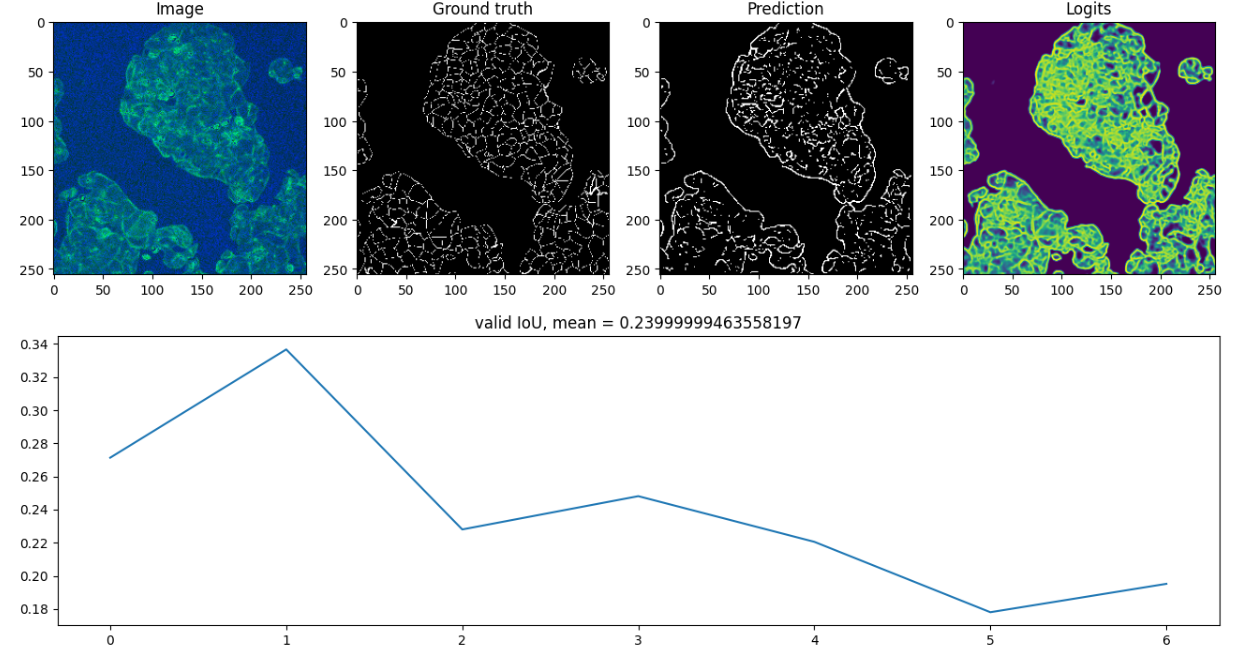

**Вывод.** Полноразмерная Unet модель, обучающаяся на аугментированных данных с использованием весов в loss-функции, дала среднее значение скорректированной метрики IoU = 0.24 на валидационном датасете. Визуально результат удовлетворительный. На картинке выше -- скриншот, так как полный output функции делает ноутбук слишком большим.

# 5. Применение модели к тесту
Примените полученную лучшую модель к тестовым данным. Что вы можете сказать о качестве ее работы?

In [ ]:
# биология
TEST_IMAGES_PATH = '/content/BBBC018_v1_images-fixed/test'
TEST_MASKS_PATH = '/content/BBBC018_v1_images-fixed/test'

In [ ]:
# # физика
# TEST_IMAGES_PATH = '/content/images/test'
# TEST_MASKS_PATH = '/content/segmaps/test'

In [ ]:
def visualize_model_predict(segment_model, dataloader, threshold=0.5):
    for i, (image, mask) in enumerate(dataloader):
      # ground_truth = ( mask > 0 )
      logit = nn.Sigmoid()(segment_model(image))
      pred = ( logit > threshold )

      # intersection = (pred & ground_truth).sum(dim=(1, 2, 3))
      # union = (pred | ground_truth).sum(dim=(1, 2, 3))

      # iou.append( (intersection/union).mean().detach().cpu().numpy() )

      fig, axs = plt.subplots(1, 3, figsize=(12, 4))
      #image.permute(1, 2, 0).int().cpu().numpy()
      axs[0].imshow(image[0,:].permute(1,2,0).int().cpu().numpy())
      axs[0].set_title("Image")

      # axs[1].imshow(mask[0,:].squeeze().int().cpu().numpy(), cmap='gray')
      # axs[1].set_title("Ground truth")

      axs[1].imshow(pred[0,:].squeeze().int().detach().cpu().numpy(), cmap='gray')
      axs[1].set_title("Prediction")

      axs[2].imshow(logit[0,:].squeeze().float().detach().cpu().numpy())
      axs[2].set_title("Logits")

    # plt.subplot(1, 1, 1)
    # mean = round(np.array(iou).mean(), 2)
    # plt.title(f'valid IoU, mean = {mean}')
    # plt.plot(iou)
    # plt.show();


In [ ]:
test_dataset = CellsDataset(TEST_IMAGES_PATH, TEST_MASKS_PATH, resize=resize)
batch_size = 1
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
visualize_model_predict(model4, test_dataloader, 0.85)

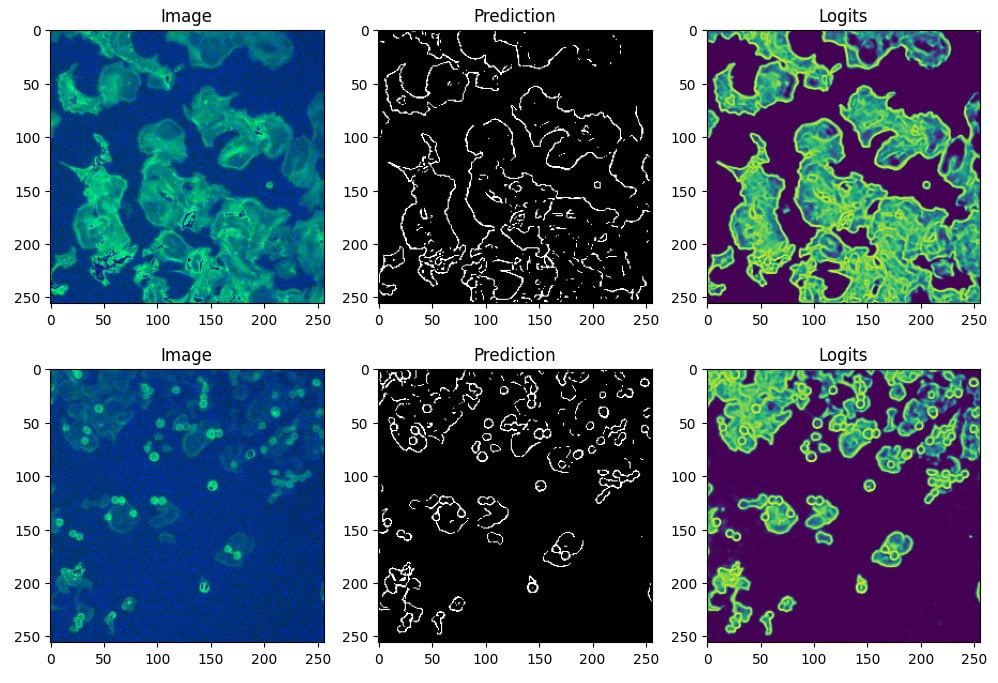

In [ ]:
# применение и визуализация

**Вывод.** В целом, все выводы уже были сделаны: аугментации помогают против переобучения, веса спасают при несбалансированных классах. Также стоит отметить, что в данной задаче SmallUnet справился не хуже полноразмерного Unet. То есть нет смысла в излишне большой модели, если модель поменьше тоже справляется. Более того, чрезмерное количество параметров при небольших датасетах, вероятно, приводит к переобучению.
**Примечание. Все output удалил, чтобы сделать ноутбук легче. Вместо этого вставил скриншот. Остальные картинки в тестовом датасете выглядели примерно так же.**